In [2]:
import os
import random
from dotenv import load_dotenv
# from flask import Flask, request

import streamlit as st
import os
import pathlib
import textwrap
from PIL import Image

In [3]:
import google.generativeai as genai

env = os.getenv("GEMINI_API_KEY")

genai.configure(api_key=env)

In [4]:
## Function to load Gemini model and get respones
model = genai.GenerativeModel("gemini-pro-vision")

In [7]:
image_date =Image.open("/Users/sachinsen/Documents/Generative Ai/Projects/END to END Multilanguage Invoice Extractor Project/Proforma_Invoice_Template_8b580ef2f0.jpeg")


In [22]:
from PIL import Image
import io

# Open an image file
image_path = '/Users/sachinsen/Documents/Generative Ai/Projects/END to END Multilanguage Invoice Extractor Project/Proforma_Invoice_Template_8b580ef2f0.jpeg'
image = Image.open(image_path)

# # Convert the image to bytes
# with io.BytesIO() as output_bytes:
#     image.save(output_bytes)
#     bytes_data = output_bytes.getvalue()

# print(type(bytes_data)) 

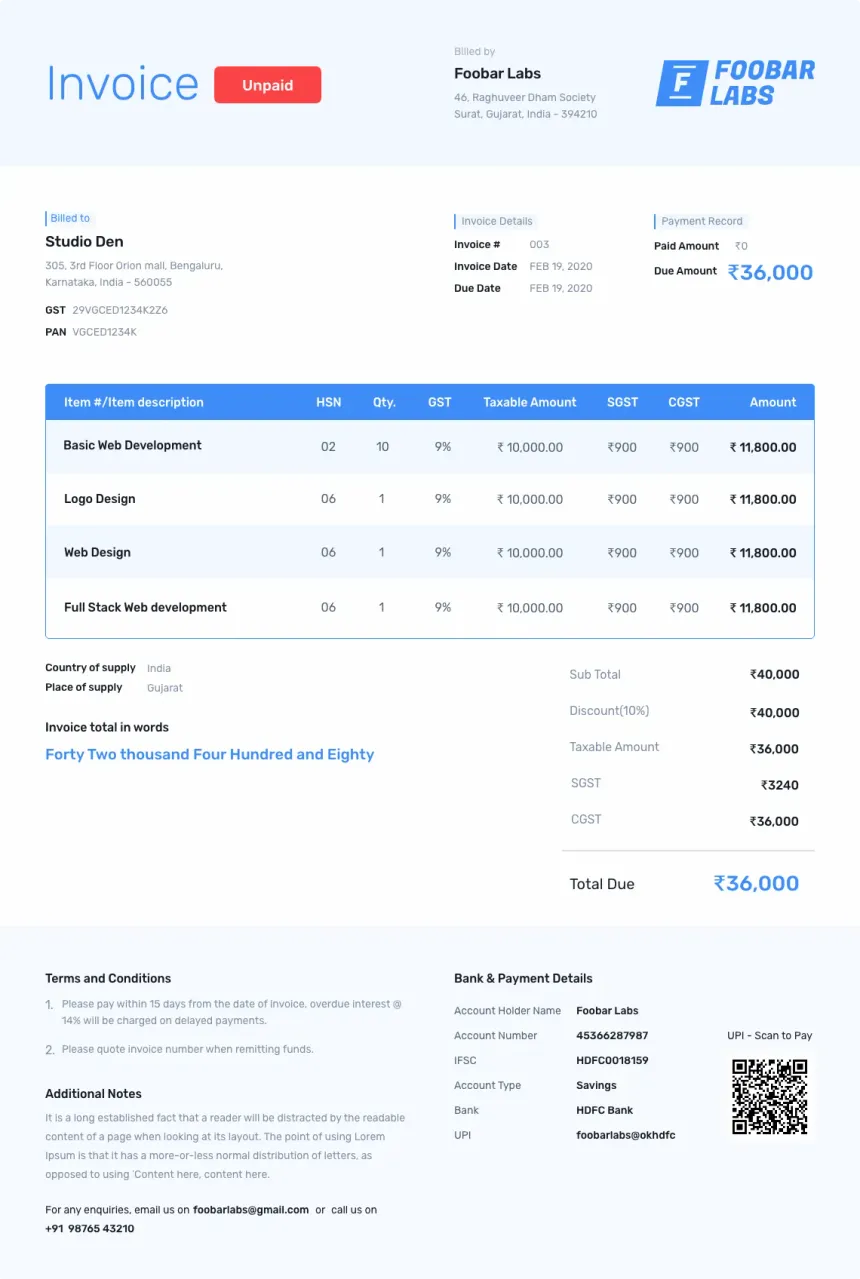

In [23]:
image

In [8]:
model = genai.GenerativeModel("gemini-pro-vision")

def get_gemini_response(input, image, prompt):
    response = model.generate_content([input, image[0], prompt])
    return response

In [13]:
input_prompt = """
               You are an expert in understanding invoices.
               You will receive input images as invoices &
               you will have to answer questions based on the input image
               """

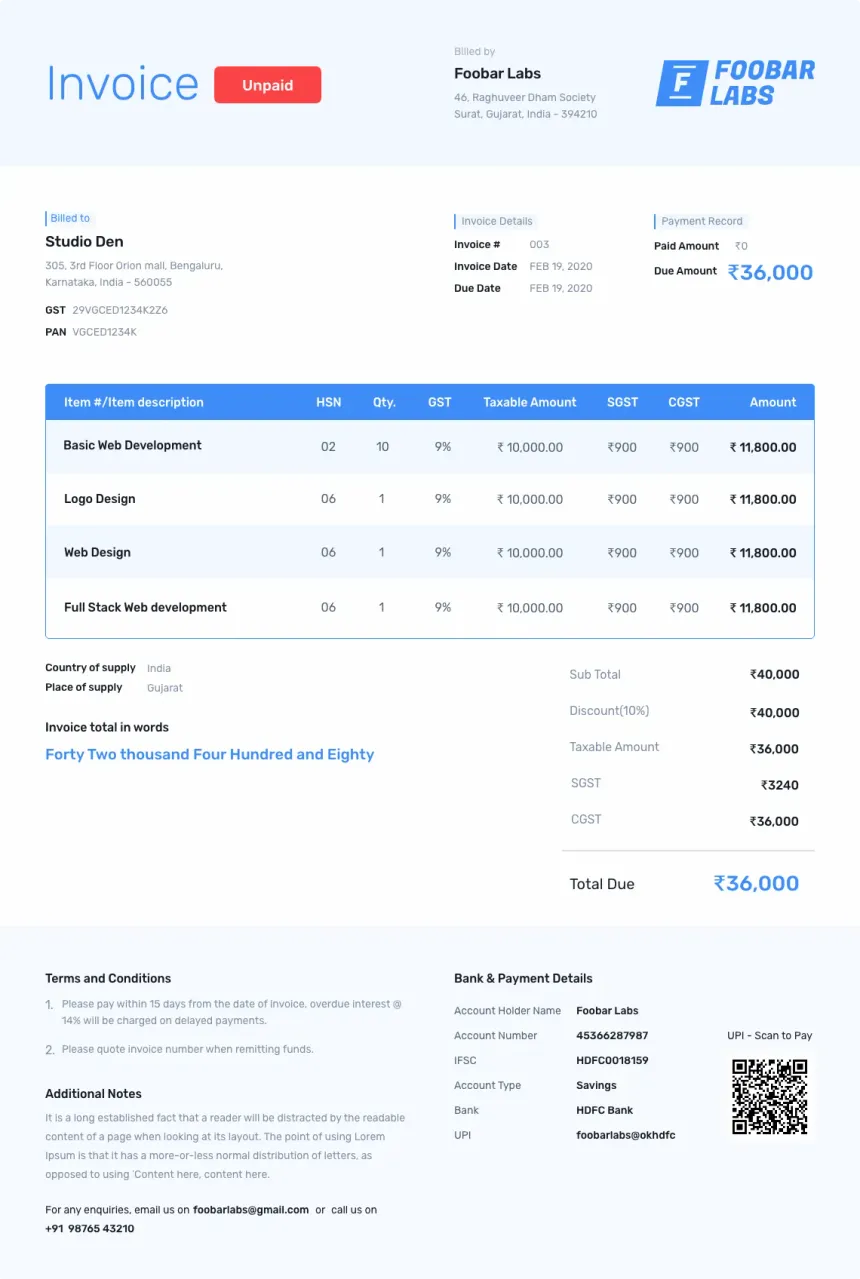

In [18]:
image_date

In [39]:
def input_image_setup(uploaded_file):
    # Check if a file has been uploaded
    if uploaded_file is not None:
        # Read the file into bytes
        bytes_data = uploaded_file.getvalue()

        image_parts = [
            {
                "mime_type": uploaded_file.type,  # Get the mime type of the uploaded file
                "data": bytes_data
            }
        ]
        return image_parts
    else:
        raise FileNotFoundError("No file uploaded")

def image_to_numpy(image):
    image_np = np.array(image)
    # Optionally normalize or preprocess image_np here
    return image_np

In [45]:
import numpy as np
def image_to_numpy(image):
    image_np = np.array(image)
    # Optionally normalize or preprocess image_np here
    return image_np

In [47]:
image= image_to_numpy(image_date)

In [53]:
response = model.generate_content(image_date, "what is invoice value")

In [55]:
response.text

" INVOICE\n\nBilled by\nFOOBAR LABS\n46, Raghuveer Dham Society\nSurat, Gujarat - 394210\n\nBilled to\nStudio Den\n305, 3rd Floor Orion Mall, Bengaluru,\nKarnataka, India - 560055\n\nGST 29VGEID234K226\nPAN VGEID234K\n\nInvoice Details\nInvoice # 003\nInvoice Date Feb 19, 2020\nDue Date Feb 19, 2020\nAmount Due ₹36,000\n\nPayment Record\nPaid Amount ₹0\nDue Amount ₹36,000\n\nItem/Service Description\nHSN Qty. GST% Taxable Amount SGST CGST Amount\n\nBasic Web Development 02 10% 10,000.00 900 900 11,800.00\nLogo Design 06 1 9% 10,000.00 900 900 11,800.00\nFull Stack Web development 06 1 9% 10,000.00 900 900 11,800.00\n\nCountry of supply India\n\nSub Total 40,000\nDiscount(10%) (4,000)\nTaxable Amount 36,000\nSGST 3240\nCGST 3240\nTotal Due 36,000\n\nTerms and Conditions\n1. Please pay within 15 days from the date of invoice, overdue interest @ 14% will be charged on delayed payments.\n2. Please quote invoice number when remitting funds.\n\nAdditional Notes\nIt is a long established fact

In [63]:
response1 = model.generate_content([image_date,"what is discount value"])

In [64]:
response1.text

' Discount value is 4000.'

In [65]:
response1 = model.generate_content([image_date,"invoice billed to whom?"])

In [66]:
response1.text

' Studio Den'